# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Mashal Khan
#### Student ID: 3906303

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* nltk
* itertools

## Introduction
You should give a brief information of this assessment task here.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

Here we the default seed for random functions

In [1]:
seed = 0

## Importing libraries 

In [2]:
# Code to import libraries as you need in this assessment, e.g.,
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
from __future__ import division
from itertools import chain
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from sklearn.manifold import TSNE

from gensim.models.fasttext import FastText

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

...... Sections and code blocks on buidling different document feature represetations


<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

#### Reading data from the files

In [3]:
# Code to perform the task...
descriptions = []
vocab = []
with open('tokenised_descriptions.txt','r') as f:
    for desc in f.readlines():
        descriptions.append(desc.replace('\n',''))
with open('vocab.txt','r') as f:
    for word in f.readlines():
        seg = word.split(':')
        vocab.append((seg[0],seg[1].replace('\n','')))

In [4]:
i = 0
titles = []
wid = []
companies = []
job_ids=[]
job_txts = []
with open('extra.tsv','r',encoding="utf-8") as f:
    for job in f.readlines():
        chunk = job.split('\t')
        job_ids.append(chunk[0])
        titles.append(chunk[1])
        wid.append(chunk[2])
        companies.append(chunk[3])
        job_txts.append(chunk[4])

Here we cross check with the real file to verify the correct ordering:

In [5]:
job_txts[422]

'Registered General Nurse  Days Stockport **** per hour Full or part time hours available This 24 bed nursing home for older people is currently recruiting for a Registered General Nurse to join its nursing team. The home is based in central Stockport As Registered General Nurse, you will lead a care team and assist the management team in the delivery of person centred care. The home is on the Gold Standards Framework and follows the Liverpool Care Pathway. Key duties will include care planning, administering medication and adhering to the standards set by the company and CQC. You will be RGN qualified with an active NMC pin. You will ideally have previous care home and end of life care experience. The hourly rate for this role is **** per hour, and there are full and part time hours available The home is in central Stockport on the main route to Manchester, so the public transport is excellent. This job was originally posted as www.totaljobs.com/JobSeeking/RegisteredGeneralNurse_job**

We use this method stats_print() to verify the data was transported correctly from the task 1 notebook file.

In [6]:
def stats_print(tokenised_jobs):
    words = list(chain.from_iterable(tokenised_jobs)) # use chain to flatten or put all the tokens in the corpus in a single list
    vocab = set(words) # create the set of types for the tokens i.e the vocabulary by applying the set method to get rid of duplicates.
    lexical_diversity = len(vocab)/len(words) # proportion of uniwue words to all words; how diverse all of the tokens are in the dataset
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of articles:", len(tokenised_jobs))
    lens = [len(job) for job in tokenised_jobs]
    print("Average document length:", np.mean(lens))
    print("Maximum document length:", np.max(lens))
    print("Minimum document length:", np.min(lens))
    print("Standard deviation of document length:", np.std(lens))

We can see from the stats_print output below that we read the data correctly from the file.

In [7]:
tokenised_jobs = [desc.split() for desc in descriptions]  # list comprehension, generate a list of tokenized job descriptions
stats_print(tokenised_jobs)

Vocabulary size:  4711
Total number of tokens:  80007
Lexical diversity:  0.058882347794567975
Total number of articles: 776
Average document length: 103.10180412371135
Maximum document length: 401
Minimum document length: 7
Standard deviation of document length: 57.553504437469286


Here we set up the tokens and vocabulary for later use:

In [8]:
words = list(chain.from_iterable(tokenised_jobs)) # use chain to flatten or put all the tokens in the corpus in a single list
vocab2 = set(words) # We create a voccabulary from the tokenised jobs, 
# to verify that the vocabulary saved to the file inside the vocab variable is correct.

In [9]:
vocab_set = set([word[0] for word in vocab])

set(sorted(vocab2)) - set([word[0] for word in vocab]) # Checks if the vocabulary matches

set()

## Count Vector creation
Here we create the count vector for all documents in the corpus

In [107]:
count_vectorizer = CountVectorizer(vocabulary = vocab_set) # initialise the CountVectorizer
count_matrix = count_vectorizer.fit_transform([' '.join(desc) for desc in tokenised_jobs])

We use the below method from the activity 3 notebook to verify whether our count vectorization is correct. We test with a random sample.

In [11]:
def validator(data_features, vocab, a_ind, job_ids,job_txts,tokenised_jobs):
    print("Job ID:", job_ids[a_ind]) # print out the Article ID
    print("--------------------------------------------")
    print("Job txt:",job_txts[a_ind]) # print out the txt of the article
    print("Job tokens:",tokenised_jobs[a_ind]) # print out the tokens of the article
    print("--------------------------------------------\n")
    print("Vector representation:\n") # printing the vector representation as format 'word:value' (
                                      # the value is 0 or 1 in for binary vector; an integer for count vector; and a float value for tfidf

    for word, value in zip(vocab, data_features.toarray()[a_ind]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In [12]:
test_ind = 29
vocab_set = sorted(list(vocab_set)) # Converts back to sorted list of tokens
validator(count_matrix,vocab_set,test_ind,job_ids,job_txts,tokenised_jobs)

Job ID: 00030
--------------------------------------------
Job txt: Senior Electrical Engineer Plymouth Ref MR**** Salary ****k As one of the largest and most renowned firms of its kind, our client prides itself on its wealth of knowledge and indepth understanding of the industry. With a reputation for unique solutions and clever design, our client is continually striving to stay at the forefront of modern technology. Employees can expect to work in an open, honest and friendly environment where teamwork and knowledge contribution are actively encouraged. Our client is currently looking for enthusiastic new individuals to join the team. Suitable Qualifications: Educated to a degree level in electrical engineering or a similar relevant discipline Actively working towards chartered status Have a comprehensive understanding of Building Services Engineering Strong communication skills (both written and verbal)  Work well as part of a team Duties: Working alongside the executive electrical 

We can see the frequency-value pairs are correct from the code below, as it matches the output above.

In [13]:
print(FreqDist(tokenised_jobs[test_ind]).most_common())

[('electrical', 4), ('design', 3), ('building', 3), ('candidates', 3), ('engineer', 2), ('understanding', 2), ('actively', 2), ('suitable', 2), ('engineering', 2), ('relevant', 2), ('comprehensive', 2), ('order', 2), ('previous', 2), ('systems', 2), ('sector', 2), ('scheme', 2), ('health', 2), ('senior', 1), ('plymouth', 1), ('ref', 1), ('largest', 1), ('renowned', 1), ('firms', 1), ('kind', 1), ('prides', 1), ('wealth', 1), ('indepth', 1), ('industry', 1), ('reputation', 1), ('unique', 1), ('solutions', 1), ('continually', 1), ('striving', 1), ('stay', 1), ('forefront', 1), ('modern', 1), ('technology', 1), ('employees', 1), ('expect', 1), ('open', 1), ('honest', 1), ('friendly', 1), ('environment', 1), ('teamwork', 1), ('contribution', 1), ('encouraged', 1), ('enthusiastic', 1), ('individuals', 1), ('qualifications', 1), ('educated', 1), ('degree', 1), ('level', 1), ('similar', 1), ('discipline', 1), ('chartered', 1), ('status', 1), ('communication', 1), ('written', 1), ('verbal', 1)

###### We convert the vectors to a dataframe to use for later.

In [14]:
# Convert count vector sparse matrix to dataframe
count_df = pd.DataFrame(count_matrix.toarray().transpose(),
                   index=count_vectorizer.get_feature_names())
count_df[45].sort_values(ascending=False)

control          14
systems          12
equipment        11
engineering       5
controls          4
                 ..
perioperative     0
perm              0
permanent         0
permission        0
aaron             0
Name: 45, Length: 4711, dtype: int64

## TF-IDF vector creation
Same process for TF-IDF vectorization... We will use these objects later for our word-embedding and document vectorization.

In [15]:
tfidf_vectorizer = TfidfVectorizer(vocabulary = vocab_set) # initialise the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(desc) for desc in tokenised_jobs])

In [16]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray().transpose(),
                   index=tfidf_vectorizer.get_feature_names())
tfidf_df[45].sort_values(ascending=True)

aaron            0.000000
permission       0.000000
permanent        0.000000
perm             0.000000
perioperative    0.000000
                   ...   
reliability      0.167053
validation       0.209597
systems          0.342218
equipment        0.374304
control          0.453779
Name: 45, Length: 4711, dtype: float64

We can see rows represent the vocabulary and columns are the document indices.

In [17]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,766,767,768,769,770,771,772,773,774,775
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
aat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
abb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
aberdeen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
abi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yorkshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.071969,0.115670,0.0,0.0,0.0
young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.125841,0.0,0.0,0.0
younger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
yrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


## FastText word embedding

In [18]:
ft_model = FastText(vector_size=100)  # instantiate the FastText model and vector size of 100
ft_model.build_vocab(corpus_iterable=tokenised_jobs) # Use the cleaned, tokenised documents to pass to corpus_iterable
ft_model.train(corpus_iterable=tokenised_jobs,epochs=ft_model.epochs, # epochs refers to the number of times an example of word is seen (default is 5)
    total_examples=ft_model.corpus_count, total_words=ft_model.corpus_total_words) 
print(ft_model)

FastText<vocab=2709, vector_size=100, alpha=0.025>


In [19]:
ft_model_wv = ft_model.wv
print('health' in ft_model_wv.key_to_index) # Check if text-embedding is correct

True


In [20]:
len(vocab_set)

4711

In [21]:
print(ft_model_wv.similarity("health", "healthcare")) # Further testing of model accuracy...

print(ft_model_wv.most_similar("healthcare", topn=10))

0.9999589
[('health', 0.9999589323997498), ('healthy', 0.9999451637268066), ('wealth', 0.9999377727508545), ('dependant', 0.9998537302017212), ('heavy', 0.9998520612716675), ('permission', 0.9998365640640259), ('shared', 0.9998346567153931), ('carried', 0.9998210072517395), ('aimed', 0.9998189806938171), ('covered', 0.9998180270195007)]


In [22]:
# bad = []
# set(set(sorted(vocab_set))- set(sorted(list(ft_model_wv.key_to_index))))==set(bad)

### Creating the document vectors for all job descriptions

In [26]:
def gen_docVecs(wv,tk_txts,tfidf=pd.DataFrame()): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # store all the word embeddings of the article

    for i in range(len(tk_txts)): # loops through all documents
        tokens = list(set(tk_txts[i])) # get the list of distinct words of the document

        temp = pd.DataFrame()  # Creates dataframe to be used. This empties/resets for every new document
        for w_ind in range(len(tokens)): # looping through each word of a single document and spliting through space
            word = tokens[w_ind] # Sets the current word from the documents vocabulary
            if word in wv:
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
    #             if word in tk_txts[i] and word not in ft_model_wv.key_to_index: # for debugging
    #                 bad.append(word)
                if not tfidf.empty:
                    word_weight = float(list(tfidf.loc[tfidf.index.str.fullmatch(word)][i])[0]) # As the dataframe has strings as indices, it will iterate using the word and i values. The list() and [0] are used to retrieve the actual value
                else:
                    word_weight = 1
                temp = temp.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe

        doc_vector = temp.sum() # take the sum of each column(w0, w1, w2,........w300) which is used to calculate the document vector value
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

weighted_docvecs = gen_docVecs(ft_model_wv,tokenised_jobs,tfidf_df)
unweighted_docvecs = gen_docVecs(ft_model_wv,tokenised_jobs)

In [27]:
'bdfbdfsg3454dafadsdfs' in ft_model_wv

True

In [28]:
weighted_docvecs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.972351,1.487682,-0.705202,-0.184204,1.669714,-0.168999,0.681874,0.521321,2.050951,-2.157410,...,-2.233495,0.441374,0.893315,-0.349450,-2.141840,3.439563,-0.081856,-0.751687,-1.874154,0.917979
1,-4.094389,3.158985,-1.471813,-0.489793,3.478320,-0.245370,1.424399,0.990223,4.148145,-4.192277,...,-4.504430,0.900829,1.752066,-0.645509,-4.341105,7.071928,-0.137359,-1.496275,-3.813340,1.872730
2,-2.680330,2.103823,-0.974773,-0.315382,2.262160,-0.154154,0.906851,0.649000,2.719985,-2.724742,...,-2.960918,0.589402,1.130864,-0.410076,-2.852312,4.641689,-0.100304,-0.958937,-2.516932,1.228713
3,-3.483441,2.686190,-1.249674,-0.423753,2.953541,-0.203643,1.198342,0.835545,3.505368,-3.521504,...,-3.814725,0.766412,1.461429,-0.519460,-3.668149,6.007287,-0.101798,-1.266337,-3.251670,1.603959
4,-1.398875,1.046080,-0.499156,-0.163658,1.191066,-0.104872,0.495558,0.351708,1.420907,-1.487249,...,-1.547973,0.315120,0.612553,-0.239554,-1.501682,2.419340,-0.036770,-0.537464,-1.302464,0.649863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-2.378698,1.802544,-0.852995,-0.194888,1.996455,-0.217380,0.805052,0.647162,2.501212,-2.615920,...,-2.717318,0.532124,1.080595,-0.422466,-2.584273,4.149693,-0.126187,-0.896194,-2.279017,1.107546
772,-3.032137,2.322842,-1.083520,-0.360456,2.591693,-0.180621,1.049468,0.734052,3.078123,-3.092906,...,-3.329257,0.648788,1.295704,-0.470746,-3.186980,5.244434,-0.096500,-1.126898,-2.825089,1.395885
773,-3.798037,2.865734,-1.349614,-0.427455,3.236269,-0.265550,1.323169,0.948021,3.863456,-3.954199,...,-4.188087,0.827365,1.647333,-0.617513,-4.004149,6.561461,-0.119013,-1.426140,-3.540977,1.753936
774,-2.916788,2.244478,-1.054204,-0.352803,2.487921,-0.173697,1.014610,0.703066,2.972480,-3.001239,...,-3.219554,0.632607,1.252346,-0.457510,-3.099184,5.051887,-0.100014,-1.085963,-2.714767,1.334377


In [29]:
weighted_docvecs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.972351,1.487682,-0.705202,-0.184204,1.669714,-0.168999,0.681874,0.521321,2.050951,-2.157410,...,-2.233495,0.441374,0.893315,-0.349450,-2.141840,3.439563,-0.081856,-0.751687,-1.874154,0.917979
1,-4.094389,3.158985,-1.471813,-0.489793,3.478320,-0.245370,1.424399,0.990223,4.148145,-4.192277,...,-4.504430,0.900829,1.752066,-0.645509,-4.341105,7.071928,-0.137359,-1.496275,-3.813340,1.872730
2,-2.680330,2.103823,-0.974773,-0.315382,2.262160,-0.154154,0.906851,0.649000,2.719985,-2.724742,...,-2.960918,0.589402,1.130864,-0.410076,-2.852312,4.641689,-0.100304,-0.958937,-2.516932,1.228713
3,-3.483441,2.686190,-1.249674,-0.423753,2.953541,-0.203643,1.198342,0.835545,3.505368,-3.521504,...,-3.814725,0.766412,1.461429,-0.519460,-3.668149,6.007287,-0.101798,-1.266337,-3.251670,1.603959
4,-1.398875,1.046080,-0.499156,-0.163658,1.191066,-0.104872,0.495558,0.351708,1.420907,-1.487249,...,-1.547973,0.315120,0.612553,-0.239554,-1.501682,2.419340,-0.036770,-0.537464,-1.302464,0.649863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-2.378698,1.802544,-0.852995,-0.194888,1.996455,-0.217380,0.805052,0.647162,2.501212,-2.615920,...,-2.717318,0.532124,1.080595,-0.422466,-2.584273,4.149693,-0.126187,-0.896194,-2.279017,1.107546
772,-3.032137,2.322842,-1.083520,-0.360456,2.591693,-0.180621,1.049468,0.734052,3.078123,-3.092906,...,-3.329257,0.648788,1.295704,-0.470746,-3.186980,5.244434,-0.096500,-1.126898,-2.825089,1.395885
773,-3.798037,2.865734,-1.349614,-0.427455,3.236269,-0.265550,1.323169,0.948021,3.863456,-3.954199,...,-4.188087,0.827365,1.647333,-0.617513,-4.004149,6.561461,-0.119013,-1.426140,-3.540977,1.753936
774,-2.916788,2.244478,-1.054204,-0.352803,2.487921,-0.173697,1.014610,0.703066,2.972480,-3.001239,...,-3.219554,0.632607,1.252346,-0.457510,-3.099184,5.051887,-0.100014,-1.085963,-2.714767,1.334377


In [30]:
unweighted_docvecs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-10.985140,8.200937,-3.901209,-1.008057,9.287731,-0.989262,3.833038,2.935184,11.404034,-12.114835,...,-12.442237,2.478012,5.005674,-1.969613,-11.938132,19.136423,-0.427211,-4.232616,-10.423079,5.124691
1,-57.680298,44.156128,-20.595757,-6.738622,49.051029,-3.603425,20.158260,14.046943,58.383450,-59.261772,...,-63.379879,12.621774,24.810467,-9.196719,-60.887157,99.485207,-1.890049,-21.270418,-53.648460,26.414635
2,-21.893627,17.042719,-7.945249,-2.504454,18.491737,-1.398362,7.455744,5.391467,22.293545,-22.537884,...,-24.280823,4.856977,9.356846,-3.420914,-23.336363,37.921722,-0.824752,-7.896144,-20.593117,10.049790
3,-43.305248,33.290760,-15.591208,-5.162725,36.808903,-2.643085,14.957152,10.484231,43.928192,-44.312874,...,-47.728039,9.482463,18.442047,-6.667349,-45.858040,74.906357,-1.401029,-15.910863,-40.508194,19.930399
4,-5.685330,4.225989,-2.028116,-0.665076,4.841714,-0.440248,2.021273,1.435904,5.781133,-6.097822,...,-6.293375,1.292990,2.497591,-0.992259,-6.138811,9.837452,-0.142421,-2.213087,-5.292873,2.646677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-23.984241,17.999584,-8.581781,-2.228976,20.211269,-2.112097,8.280644,6.386010,24.942774,-26.141933,...,-27.117685,5.361232,10.801372,-4.142134,-25.971521,41.675724,-1.083776,-9.127860,-22.761770,11.134792
772,-28.384201,21.767242,-10.144732,-3.395274,24.269251,-1.661932,9.836161,6.841050,28.807041,-28.890816,...,-31.137724,6.046799,12.115027,-4.371555,-29.797503,49.084297,-0.905472,-10.544209,-26.434320,13.049135
773,-51.940956,39.228493,-18.523548,-5.916565,44.268894,-3.576627,18.155626,12.899160,52.889511,-54.267025,...,-57.313622,11.374024,22.572861,-8.481227,-55.047771,89.834633,-1.654877,-19.602047,-48.424522,23.982817
774,-29.278364,22.347929,-10.537817,-3.504679,25.019257,-1.827322,10.222361,7.089081,29.837250,-30.280787,...,-32.322090,6.383616,12.598066,-4.635520,-31.130274,50.700642,-0.973967,-10.997834,-27.293427,13.443869


## Task 3. Job Advertisement Classification

...... Sections and code blocks on buidling classification models based on different document feature represetations. 
Detailed comparsions and evaluations on different models to answer each question as per specification. 

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

Here we add the labels to the IDs:

In [31]:
labels = np.concatenate([np.full(232, 'Engineering'), # This labels each data sample as the category they were found in the file.
                         np.full(191, 'Healthcare'), # The order hasn't changed since reading the files in, 
                         np.full(198, 'Accounting'), # so the correct categories will match the data
                         np.full(155, 'Sales')])

### Here we fit the count-based vector and plot the results

Accuracy:  0.8599221789883269


Heatmap for count-based vectors logistic regression prediction


Text(0.5, 15.0, 'Predicted')

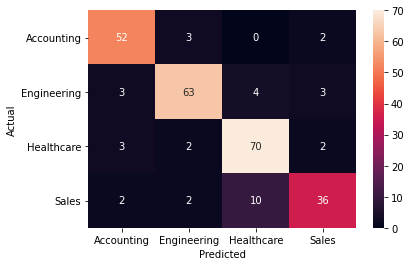

In [63]:
# Here we split the count_vectorizer data into training and testing datasets
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_matrix, labels, list(range(0,len(labels))),test_size=0.33, random_state=seed)

# Here we initialize the model
model = LogisticRegression(max_iter = 2000,random_state=seed)
model.fit(X_train, y_train) # Fit the model to the training data
print("Accuracy: ", model.score(X_test, y_test))
print('\n\nHeatmap for count-based vectors logistic regression prediction')

y_pred = model.predict(X_test) # Stores the predicted values

conf_mat = confusion_matrix(y_test, y_pred)
categories = sorted(list(set(labels))) # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories) # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [33]:
count_matrix.shape[0]

776

In [87]:
des = ('We are currently looking for a Graduate Engineer to join our project team on a long term  FIFO role.'+
' You will be supporting the Projects team with project deliverables to some of the largest mining clients in WA.'+
' Your responsibilities will includeResponsibilities will includeAssisting with compiling and developing tender documentation.'+
' Supporting the team with preparation of schedules, pricing, HSE, QAQC and Engineering documentation for submission.'+
' Assisting with management of fabrication packages.'+
' Coordinating procurement of materials relevant to the project.'+
' Working closely with clients, subcontractors, DIAB management and all other project staff.'+
' Travelling to site from time to time for tender site visits and execution support.'+
' Ad hoc business support and administrative duties as required.'+
' Assisting in maintaining on-site Quality and documentation requirements')
# des = ('Event Medical Plus is a South Australian company that delivers on our promise to the community of professional event health and medical services. '+
# 'We have fast become a disruptive force in the event healthcare industry and are continuing to lead the way in delivering quality healthcare services and '+
# 'now, providing a solid grounding for future and budding health practitioners.'+
# ' Established in 2014, Event Medical Plus continually raises the standard in service delivery and clinical care. ')

In [64]:
count_vectorizer = CountVectorizer(vocabulary = vocab_set) # initialise the CountVectorizer
count_matrix = count_vectorizer.fit_transform([des])

Accuracy:  0.0


Heatmap for count-based vectors logistic regression prediction


Text(0.5, 15.0, 'Predicted')

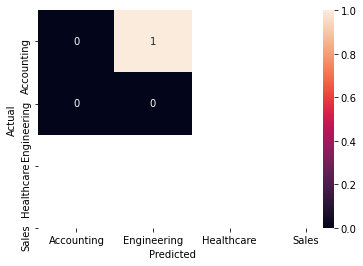

In [66]:
print("Accuracy: ", model.score(count_matrix, ['Sales']))
print('\n\nHeatmap for count-based vectors logistic regression prediction')

y_pred = model.predict(count_matrix) # Stores the predicted values

conf_mat = confusion_matrix(['Accounting'], y_pred)
categories = sorted(list(set(labels))) # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories) # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [108]:
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_matrix, labels, list(range(0,len(labels))),test_size=0.000001, random_state=seed)

In [79]:
X_train

<519x4711 sparse matrix of type '<class 'numpy.int64'>'
	with 40770 stored elements in Compressed Sparse Row format>

In [109]:
X_train

<775x4711 sparse matrix of type '<class 'numpy.int64'>'
	with 61604 stored elements in Compressed Sparse Row format>

In [110]:
lrmodel = LogisticRegression(max_iter = 2000,random_state=seed)
lrmodel.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [105]:
lrmodel

LogisticRegression(max_iter=2000, random_state=0)

In [112]:
pickle.dump(lrmodel, open('lrmodel.pkl', 'wb'))

In [99]:
des = '''We have an excellent position for a band 7 dietitian to work in London The role: This is a new role to establish the paediatric home enteral feeding service. The locum role will mobilise the service including assessment, care planning and case management of 80 children and liaison between community and acute care providers. You need to have experience in community paediatric home enteral feeding and experience of multidisciplinary working. Strong project management and communication skills are essential, along with the ability to supervise a small team of **** people. Occasional travel to central London may be required, a car driver and owner is essential for this role. Position: Band 7 dietitian Start Date: 4th February 2013 Duration: 34 months Location: London Car Driver: Yes If this sounds like the next job for you, please get in touch ASAP by calling Lauren Bradshaw on or email your current CV to Refer a friend for this dietetic job and earn 200 Cash About us… Working with Mediplacements you'll receive: A dedicated one to one service Fast track registration process Excellent rates of pay Assistance with travel and accommodation Weekly pay on time, every time Access to exclusive NHS and Private sector jobs 24 hour service from our friendly consultants Additional benefits include: Our loyalty scheme; TPG incentives thousands of online and in store discounts No Registration Fee Reimbursed CRBs Free online training available Mediplacements are a GPS (formerly Buying Solutions) approved agency and hold many 'Preferred Supplier' agreements with the NHS Nationwide. This status ensures that our candidates gain the best possible exposure to quality standards, best practice and the best selection of temporary jobs available, visit for details.'''

In [103]:
des = 'This is a engineering job. please if youre good at engineering stuff join us.' +  ' engineering'*40

In [111]:
count_vectorizer = CountVectorizer(vocabulary = vocab_set) # initialise the CountVectorizer
count_matrix = count_vectorizer.fit_transform([des])

lrmodel.predict(count_matrix)[0]

'Engineering'

In [126]:
len(vocab_set)

4711

In [127]:
with open('vocabulary.txt','w') as file:
    for word in vocab_set:
        file.write(word+'\n')

In [129]:
with open('vocabulary.txt') as file:
    new = file.read().splitlines()
print(new)

['aaron', 'aat', 'abb', 'aberdeen', 'abi', 'abilities', 'abreast', 'abroad', 'absence', 'absolute', 'ac', 'aca', 'academic', 'academy', 'acca', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessible', 'accident', 'accommodates', 'accommodation', 'accomplished', 'accordance', 'account', 'accountabilities', 'accountability', 'accountable', 'accountancy', 'accountant', 'accountants', 'accounting', 'accounts', 'accreditation', 'accredited', 'accruals', 'accuracy', 'accurate', 'accurately', 'achievable', 'achieve', 'achieved', 'achievement', 'achievements', 'achiever', 'achieving', 'acii', 'acquired', 'acquisition', 'acquisitions', 'act', 'acting', 'action', 'actions', 'active', 'actively', 'activities', 'activity', 'acts', 'actual', 'actuarial', 'acumen', 'acute', 'ad', 'adam', 'adapt', 'adaptability', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'additions', 'address', 'addresses', 'addressing', 'adecco', 'adept', 'adequacy', 'adequate', 'adequately

In [39]:
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.8599221789883269


In [41]:
descFT = FastText.load("models\desc_FT.model")
descFT_wv= descFT.wv

In [42]:
def descTokenizer(text):
    text = text.lower() # convert to lower case
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?" # matches all words, including words with hyphens in between
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_job = tokenizer.tokenize(text) # tokenises the input text data
    return tokenised_job

In [43]:
pkl_filename = "models\descFT_LR.pkl"
with open(pkl_filename, 'rb') as file:
    ftmodel = pickle.load(file)

# Predict the label of tokenized_data

In [52]:
print(descFT)

FastText<vocab=2741, vector_size=200, alpha=0.025>


In [54]:
def gen_docVecs(wv,tk_txts): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # if we haven't pre-processed the articles, it's a good idea to remove stop words

    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

Accuracy:  0.35797665369649806
Weighted In-house FastText: tSNE 2 dimensional projected Feature space


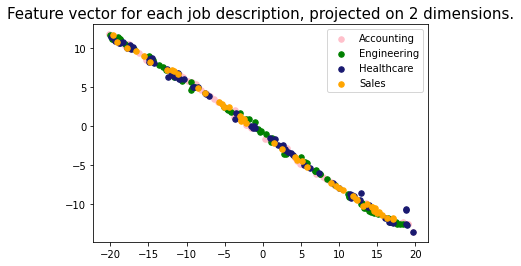

In [97]:
# weighted_docvecs = gen_docVecs(descFT_wv,tokenised_jobs)

X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(weighted_docvecs, labels, list(range(0,len(labels))),test_size=0.33, random_state=seed)
print("Accuracy: ", ftmodel.score(X_test, y_test))

features = weighted_docvecs.to_numpy() # convert the dataframe stored features to an numpy array
print("Weighted In-house FastText: tSNE 2 dimensional projected Feature space")
plotTSNE(labels,features)
y_pred = ftmodel.predict(X_test)

In [102]:
descFT_dvs = gen_docVecs(descFT_wv, descTokenizer(des))
y_pred = ftmodel.predict(descFT_dvs)
y_pred = y_pred[0]
y_pred

'Accounting_Finance'

Text(0.5, 15.0, 'Predicted')

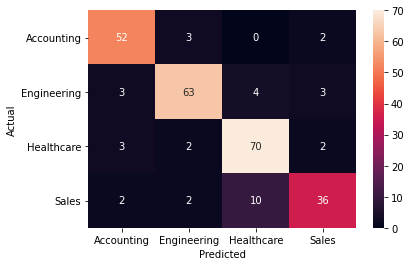

In [45]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
y_pred = pickled_model.predict(X_test) # Stores the predicted values

conf_mat = confusion_matrix(y_test, y_pred)
categories = sorted(list(set(labels))) # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories) # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Here we fit the weighted document vector and plot the results

In [48]:
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(list(set(labels)))
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each job description, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()

In [ ]:
features = weighted_docvecs.to_numpy() # convert the dataframe stored features to an numpy array
print("Weighted In-house FastText: tSNE 2 dimensional projected Feature space")
plotTSNE(labels,features)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(weighted_docvecs, labels, list(range(0,len(labels))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 2000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))
print('\n\n')

### Here we fit the unweighted document vector and plot the results


In [ ]:
features = unweighted_docvecs.to_numpy() # convert the dataframe stored features to an numpy array
print("Unweighted In-house FastText: tSNE 2 dimensional projected Feature space")
plotTSNE(labels,features)
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(unweighted_docvecs, labels, list(range(0,len(labels))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 2000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))
print('\n\n')

### Implementing 5 K-folds validation

In [ ]:
kf = KFold(n_splits=5) # specifies number of splits, to generate sample indices
def perf_kfolds(wv,labels,count=False):
    average = 0 # Stores average score
    for train_index, test_index in kf.split(wv):
#         print(train_index)
        if count:
            X_train, X_test = wv[train_index], wv[test_index] # Count vector data is in array format rather than dataframe
        else:
            X_train, X_test = wv.iloc[train_index], wv.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        model = LogisticRegression(max_iter = 2000,random_state=seed)
        model.fit(X_train, y_train)
        average += model.score(X_test, y_test)
        print("Accuracy: ", model.score(X_test, y_test))
    print('Average:',average/5)

Here is the weighted TF-IDF k-folds validation:

In [ ]:
perf_kfolds(weighted_docvecs,labels)

Here is the weighted unweighted k-folds validation:

In [ ]:
perf_kfolds(unweighted_docvecs,labels)

Here is the count-based k-folds validation:

In [ ]:
perf_kfolds(count_matrix,labels,True)

## Using the title column and measuring performance
We will see if the title feature of all jobs improve the logistic regressor model performance.

In [ ]:
def descTokenizer(text): # bring method from task 1 for tokenisation
    text = text.lower() # convert to lower case
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?" # matches all words, including words with hyphens in between
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_job = tokenizer.tokenize(text) # tokenises the input text data
    return tokenised_job
tokenised_titles = [descTokenizer(title) for title in titles]

In [ ]:
twords = list(chain.from_iterable(tokenised_titles)) # use chain to flatten or put all the tokens in the corpus in a single list
tvocab = set(twords) # We create a voccabulary from the tokenised jobs, 

Here we initalize a new TF-IDF vector for titles:

In [ ]:
title_tfidf_vectorizer = TfidfVectorizer(vocabulary = tvocab) # initialise the TfidfVectorizer
title_matrix = tfidf_vectorizer.fit_transform([' '.join(desc) for desc in tokenised_jobs])

### Q1: It seems the normal counts vectoriser is the best model, rather than the word-embedding models.

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [ ]:
count_df

In [ ]:
# code to save output data...
with open('count_vectors.txt','w') as f:
    for i in range(len(wid)):
        f.write('#' + str(wid[i])+',')
        for ind,row in count_df.iterrows():
            f.write(str(row[i])+':'+ind)
        f.write('\n')

## Summary
Unfortunately, I scored a very low accuracy score for the weighted TF-IDF word embedding model, of 54%. One potential reason is that when using the gen_docVecs() method, as it was retrieving the words from the FastText object, it was not recognising words from the tokenised_words vocabulary. Although this could be an intentional effect of the object.

## Couple of notes for all code blocks in this notebook
- please provide proper comment on your code
- Please re-start and run all cells to make sure codes are runable and include your output in the submission.   
<span style="color: red"> This markdown block can be removed once the task is completed. </span>